In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('headbrain.csv')

In [3]:
dataset.shape

(237, 4)

In [4]:
dataset.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [5]:
dataset.describe()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


In [84]:
X = dataset['Head Size(cm^3)'].values
y = dataset['Brain Weight(grams)'].values

In [80]:
mean_x = np.mean(X)
mean_y = np.mean(y)

In [81]:
numer = 0
denom = 0

for i in range(len(X)):
    numer += (X[i] - mean_x) * (y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2

slope = numer / denom
intercept = mean_y - slope * mean_x

In [9]:
slope, intercept

(0.26342933948939945, 325.57342104944223)

In [10]:
from scipy.stats import linregress

In [11]:
linregress(X,y)

LinregressResult(slope=0.2634293394893994, intercept=325.57342104944235, rvalue=0.7995697092542962, pvalue=5.957630839406541e-54, stderr=0.012907433440886988)

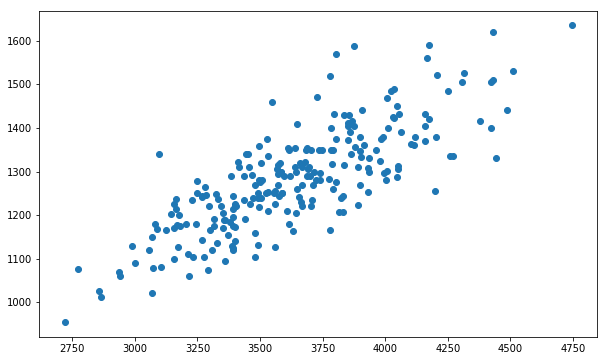

In [12]:
plt.figure(figsize=(10,6))
plt.scatter(X,y)

In [13]:
predictions = []

for i in range(len(X)):
    y_pred = slope * X[i] + intercept
    predictions.append(y_pred)


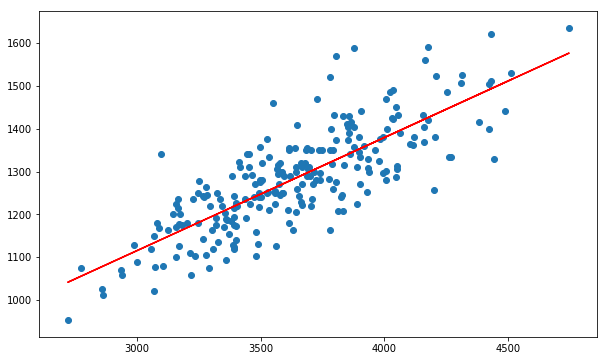

In [14]:
plt.figure(figsize=(10,6))
plt.plot(X,predictions,'red')
plt.scatter(X,y)

In [15]:
newX = 3000

In [16]:
y_pred = 3000 * slope + intercept

In [17]:
y_pred

1115.8614395176405

In [19]:
error = 0
for i in range(len(y)):
    error += (predictions[i] - y[i]) ** 2

mse = error / len(y)

In [20]:
mse

5201.38402800233

In [22]:
rmse = np.sqrt(mse)

In [23]:
rmse

72.1206213783709

In [24]:
y[:10]

array([1530, 1297, 1335, 1282, 1590, 1300, 1400, 1255, 1355, 1375],
      dtype=int64)

In [26]:
print(predictions[:10])

[1514.1666008256125, 1310.2722920608173, 1448.0458366137732, 1320.546036300904, 1425.9177720966638, 1269.9676031189392, 1322.6534710168191, 1263.118440292215, 1277.3436246246424, 1374.549050896231]


In [66]:
from sklearn.preprocessing import StandardScaler

In [87]:
sc = StandardScaler()
X = sc.fit_transform(X.reshape(-1,1))
y = sc.fit_transform(y.reshape(-1,1))

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


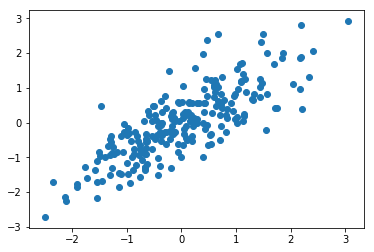

In [71]:
plt.scatter(X,y)

In [86]:
n = len(X)
slope = 0
intercept = 0

alpha = 0.0001
epochs = 50000

In [88]:
for i in range(epochs):
    pred = slope * X + intercept
    loss = pred - y
    intercept -= alpha * ((2/n) * sum(loss))
    slope -= alpha * (2/n) * sum (loss * X)

print(slope, intercept)

[0.79953345] [-3.32702735e-16]


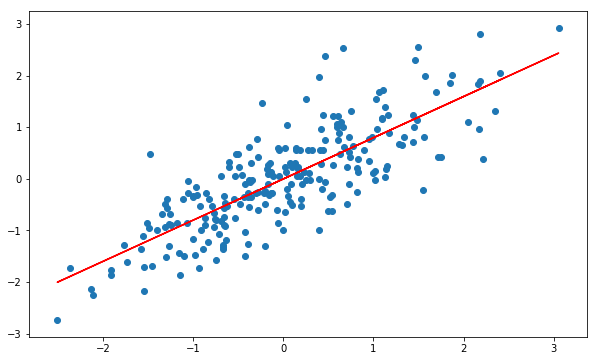

In [89]:
predictions = []

for i in range(len(X)):
    y_pred = slope * X[i] + intercept
    predictions.append(y_pred)

plt.figure(figsize=(10,6))
plt.plot(X,predictions,'red')
plt.scatter(X,y)

In [90]:
from sklearn.metrics import mean_squared_error

In [91]:
mean_squared_error(y,predictions)

0.36068828135808645

In [92]:
# will convert scaled values to original values
pred_transformed = sc.inverse_transform(predictions)

In [93]:
mean_squared_error(y,pred_transformed)

1654830.1655770235